# Evaluation examples

In [122]:
%load_ext autoreload
%autoreload 2
import numpy as np
from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPCv1 import ClusterPC as ClusterPCv1
from clustercausal.algorithms.ClusterPCv2 import ClusterPC as ClusterPCv2
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
%autoreload 2
# Node names from 0 to 19
# node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']#, '10', '11', '12', '13', '14', '15', '16', '17', '18','19']
node_names = None
#seed = 12343
simulation = Simulator(n_nodes = 30, n_edges = 100, n_clusters = 4, seed = 122663, sample_size = 1000, node_names=node_names)
cluster_dag = simulation.run()

2023-09-05 10:46:34,748 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


In [124]:
print(cluster_dag.cluster_mapping)
print(cluster_dag.cluster_edges)

{'C1': ['X7', 'X27', 'X17', 'X21', 'X1', 'X6', 'X11', 'X23', 'X5', 'X9', 'X4', 'X12', 'X25', 'X29', 'X22', 'X30', 'X15', 'X26', 'X8'], 'C2': ['X10'], 'C3': ['X20', 'X28', 'X16', 'X14', 'X3'], 'C4': ['X18', 'X24', 'X13', 'X19', 'X2']}
[('C1', 'C4'), ('C1', 'C3'), ('C3', 'C4'), ('C2', 'C3'), ('C1', 'C2'), ('C2', 'C4')]


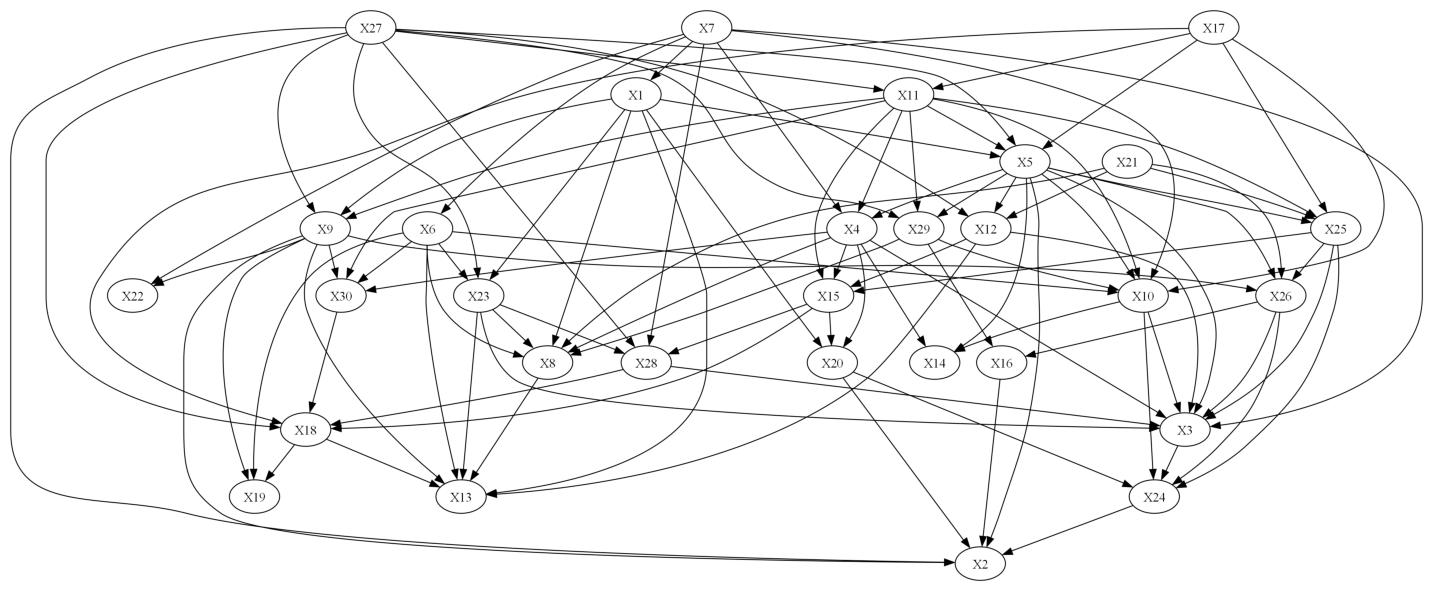

In [125]:
cluster_dag.true_dag.draw_pydot_graph()

In [126]:
# cluster_dag.cdag_to_mpdag()
# cluster_dag.draw_mpdag()

In [127]:
# c4 = ClusterDAG.get_node_by_name('C4', cluster_dag.cluster_graph)
# c4_local_graph = cluster_dag.get_local_graph(cluster = c4)
# c4_local_graph.draw_pydot_graph()

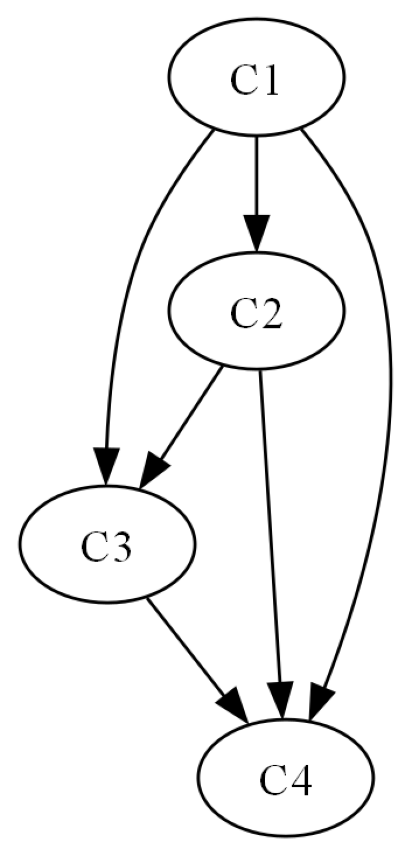

In [128]:
cluster_dag.draw_cluster_graph()

In [129]:
cluster_pcv1 = ClusterPCv1(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.1, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
est_graph_v1 = cluster_pcv1.run()

In:     C4, Depth=0, working on node 23: 100%|██████████| 5/5 [00:00<00:00, 416.80it/s, duration: 0.11sec]


Duration of algorithm was 5.70sec


In [130]:
cluster_dag.true_dag.to_nx_graph()
# from clustercausal.algorithms.OldClusterPC import ClusterPC
cluster_pcv2 = ClusterPCv2(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.1, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True, true_dag = cluster_dag.true_dag.nx_graph)
est_graph_v2= cluster_pcv2.run()

C4 phase, Depth=5, working on node 23: 100%|██████████| 5/5 [00:00<00:00, 273.54it/s, duration: 2.26sec]


Duration of algorithm was 5.61sec


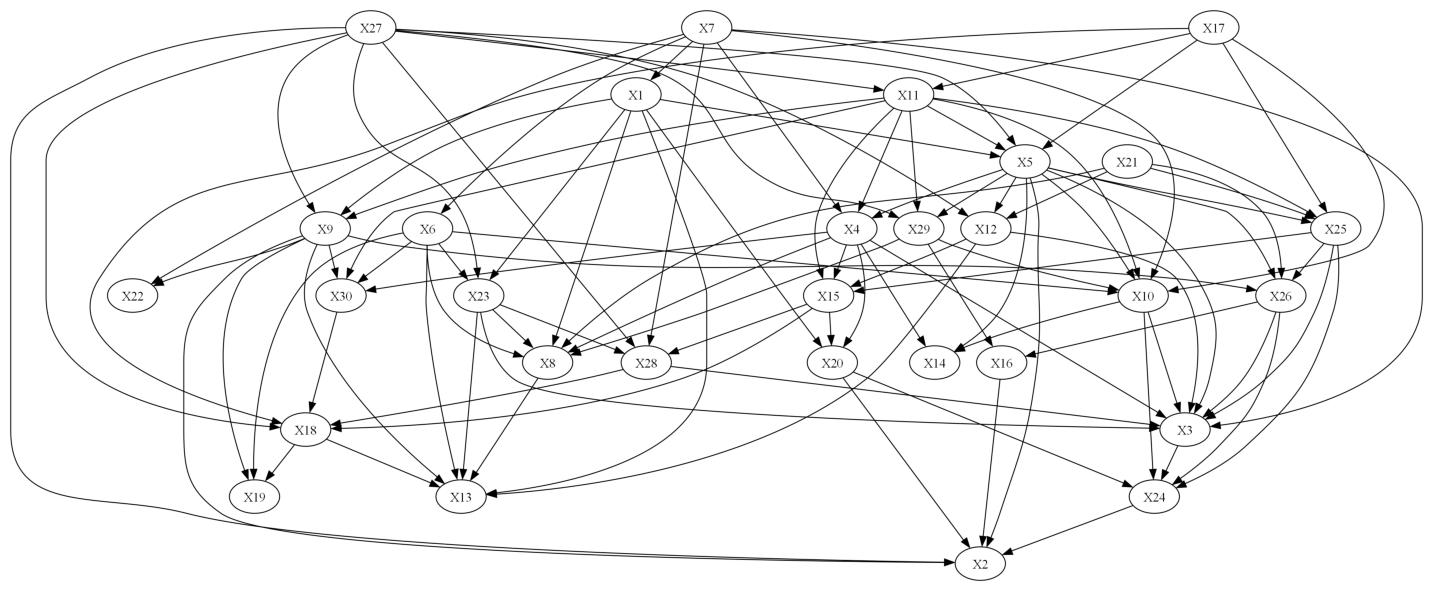

In [131]:
cluster_dag.true_dag.draw_pydot_graph()

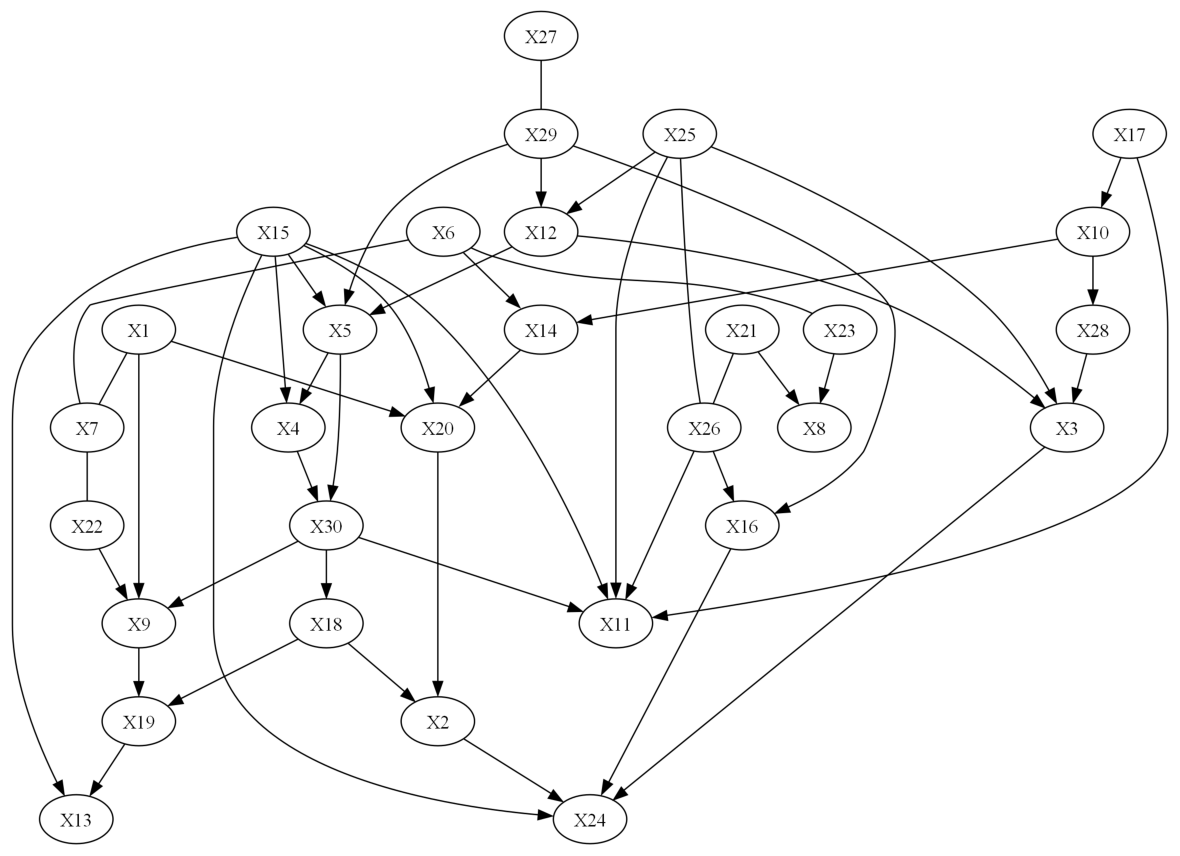

In [132]:
est_graph_v1.draw_pydot_graph()

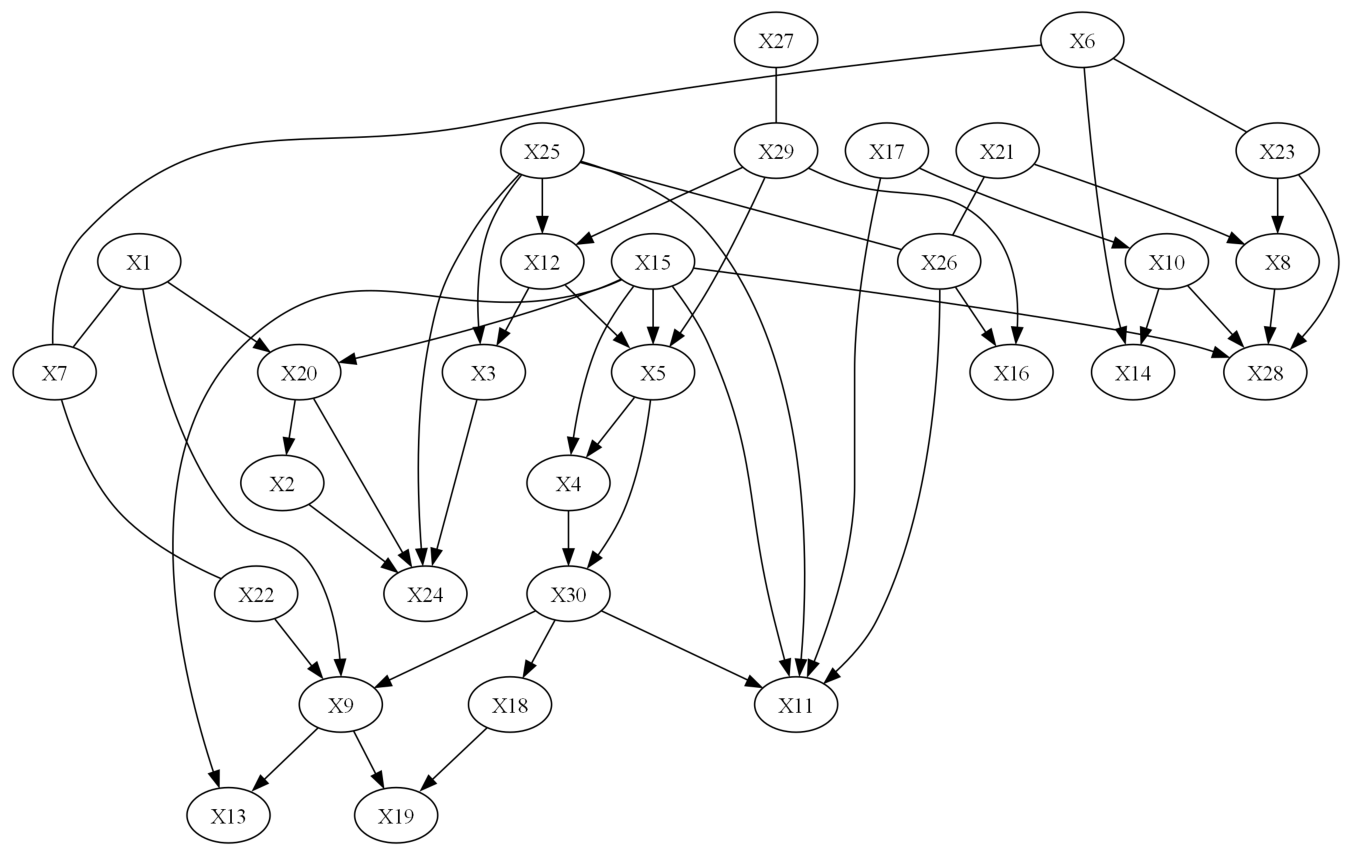

In [133]:
est_graph_v2.draw_pydot_graph()

In [134]:
evaluation_v1 = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph_v1.G)
adjacency_confusion_v1, arrow_confusion_v1, shd_v1, sid_v1 = evaluation_v1.get_causallearn_metrics(sid = False)
print("Adjacency confusion: ", adjacency_confusion_v1)
print("Arrow confusion: ", arrow_confusion_v1)
print("SHD: ", shd_v1)
print("SID: ", sid_v1)

Adjacency confusion:  {'true_positive': 36, 'false_positive': 13, 'false_negative': 64, 'true_negative': 322, 'precision': 0.7346938775510204, 'recall': 0.36, 'f1_score': 0.48322147651006714}
Arrow confusion:  {'true_positive': 20.0, 'false_positive': 22.0, 'false_negative': 80.0, 'true_negative': 778.0, 'precision': 0.47619047619047616, 'recall': 0.2, 'f1_score': 0.2816901408450704, 'true_positive_ce': 20.0, 'false_positive_ce': 9.0, 'false_negative_ce': 16.0, 'true_negative_ce': 855.0, 'precision_ce': 0.6896551724137931, 'recall_ce': 0.5555555555555556, 'f1_score_ce': 0.6153846153846154}
SHD:  86
SID:  {'sid_lower': None}


In [135]:
evaluation_v2 = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph_v2.G)
adjacency_confusion_v2, arrow_confusion_v2, shd_v2, sid_v2 = evaluation_v2.get_causallearn_metrics(sid = False)
print("Adjacency confusion: ", adjacency_confusion_v2)
print("Arrow confusion: ", arrow_confusion_v2)
print("SHD: ", shd_v2)
print("SID: ", sid_v2)

Adjacency confusion:  {'true_positive': 40, 'false_positive': 9, 'false_negative': 60, 'true_negative': 326, 'precision': 0.8163265306122449, 'recall': 0.4, 'f1_score': 0.5369127516778525}
Arrow confusion:  {'true_positive': 24.0, 'false_positive': 18.0, 'false_negative': 76.0, 'true_negative': 782.0, 'precision': 0.5714285714285714, 'recall': 0.24, 'f1_score': 0.33802816901408445, 'true_positive_ce': 24.0, 'false_positive_ce': 9.0, 'false_negative_ce': 16.0, 'true_negative_ce': 851.0, 'precision_ce': 0.7272727272727273, 'recall_ce': 0.6, 'f1_score_ce': 0.6575342465753425}
SHD:  78
SID:  {'sid_lower': None}


In [136]:
print(adjacency_confusion_v1 == adjacency_confusion_v2)
print(arrow_confusion_v1 == arrow_confusion_v2)
print(shd_v1 == shd_v2)
print(sid_v1 == sid_v2)

False
False
False
True


In [137]:
# Comparison with baseline pc
from causallearn.search.ConstraintBased.PC import pc
# node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
causallearn_cg = pc(cluster_dag.data, alpha = 0.1, verbose=False, node_names=node_names)

Depth=4, working on node 29: 100%|██████████| 30/30 [00:00<00:00, 1250.72it/s]


In [138]:
evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg.G)
cl_adjacency_confusion, cl_arrow_confusion, cl_shd, cl_sid  = evaluation_causallearn.get_causallearn_metrics(sid = False)
print("Adjacency confusion: ", cl_adjacency_confusion)
print("Arrow confusion: ", cl_arrow_confusion)
print("SHD: ", cl_shd)
# print("SID", cl_sid)

Adjacency confusion:  {'true_positive': 32, 'false_positive': 5, 'false_negative': 68, 'true_negative': 330, 'precision': 0.8648648648648649, 'recall': 0.32, 'f1_score': 0.46715328467153283}
Arrow confusion:  {'true_positive': 10.0, 'false_positive': 17.0, 'false_negative': 90.0, 'true_negative': 783.0, 'precision': 0.37037037037037035, 'recall': 0.1, 'f1_score': 0.15748031496062992, 'true_positive_ce': 10.0, 'false_positive_ce': 13.0, 'false_negative_ce': 22.0, 'true_negative_ce': 855.0, 'precision_ce': 0.43478260869565216, 'recall_ce': 0.3125, 'f1_score_ce': 0.36363636363636365}
SHD:  86


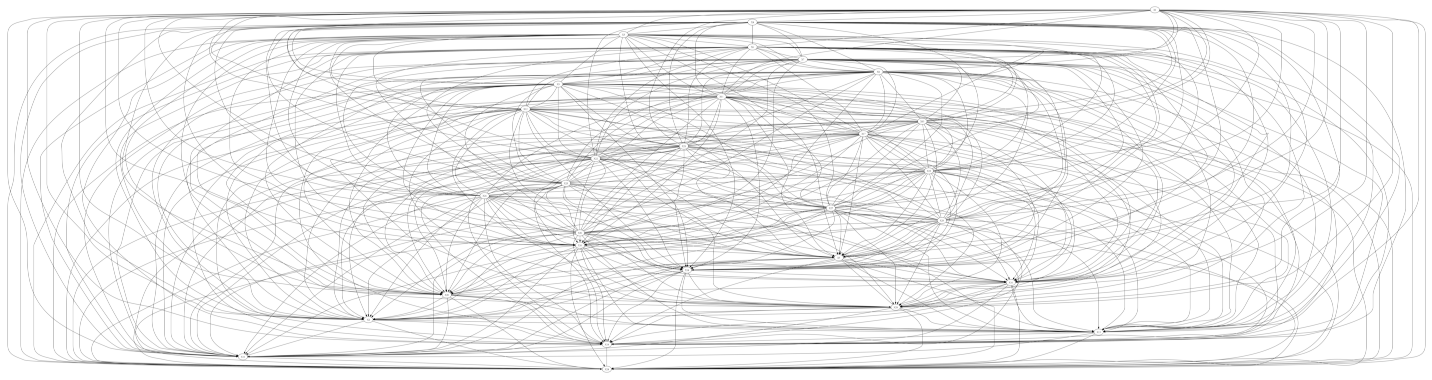

In [147]:
cluster_dag.cdag_to_mpdag()
cluster_dag.draw_mpdag()

In [149]:
pruned_causallearn_cg = Evaluator.get_cluster_pruned_benchmark(cluster_dag, cluster_dag.cg)
pruned_evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = pruned_causallearn_cg.G)
pruned_cl_adjacency_confusion, pruned_cl_arrow_confusion, pruned_cl_shd, pruned_cl_sid  = pruned_evaluation_causallearn.get_causallearn_metrics(sid = False)
print("Adjacency confusion: ", pruned_cl_adjacency_confusion)
print("Arrow confusion: ", pruned_cl_arrow_confusion)
print("SHD: ", pruned_cl_shd)

Adjacency confusion:  {'true_positive': 100, 'false_positive': 335, 'false_negative': 0, 'true_negative': 0, 'precision': 0.22988505747126436, 'recall': 1.0, 'f1_score': 0.37383177570093457}
Arrow confusion:  {'true_positive': 49.0, 'false_positive': 195.0, 'false_negative': 51.0, 'true_negative': 605.0, 'precision': 0.20081967213114754, 'recall': 0.49, 'f1_score': 0.2848837209302326, 'true_positive_ce': 49.0, 'false_positive_ce': 0.0, 'false_negative_ce': 51.0, 'true_negative_ce': 800.0, 'precision_ce': 1.0, 'recall_ce': 0.49, 'f1_score_ce': 0.6577181208053691}
SHD:  335


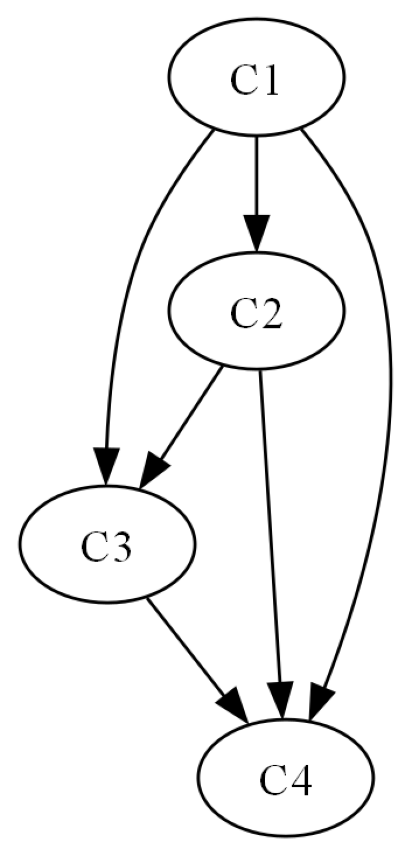

In [153]:
cluster_dag.cluster_graph.draw_pydot_graph()

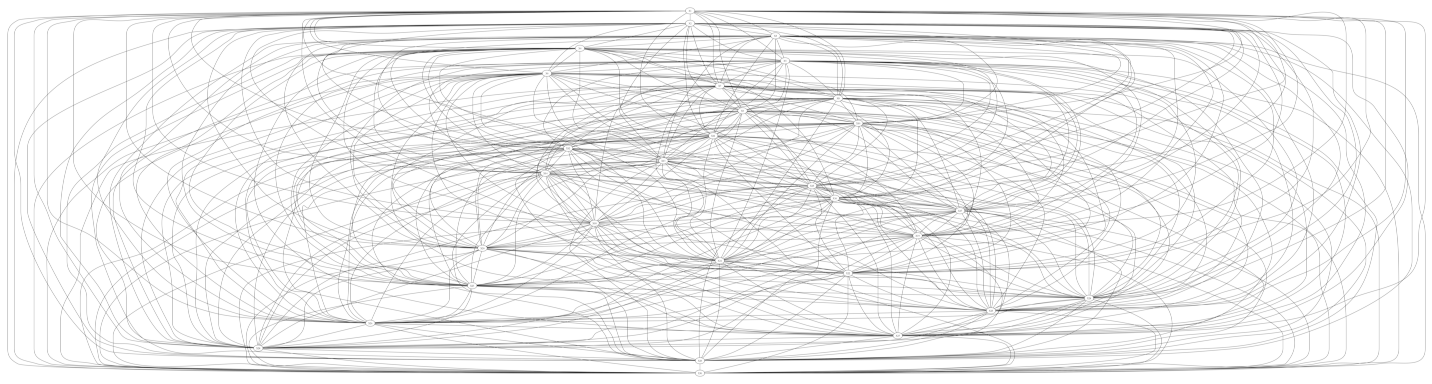

In [151]:
from causallearn.graph.GraphClass import CausalGraph
cg_full = CausalGraph(no_of_var = 30)
cg_full.draw_pydot_graph()

In [152]:
full_evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = cg_full.G)
full_adjacency_confusion, full_arrow_confusion, full_shd, full_sid  = full_evaluation.get_causallearn_metrics(sid = False)
print("Adjacency confusion: ", full_adjacency_confusion)
print("Arrow confusion: ", full_arrow_confusion)
print("SHD: ", full_shd)

Adjacency confusion:  {'true_positive': 100, 'false_positive': 335, 'false_negative': 0, 'true_negative': 0, 'precision': 0.22988505747126436, 'recall': 1.0, 'f1_score': 0.37383177570093457}
Arrow confusion:  {'true_positive': 0.0, 'false_positive': 0.0, 'false_negative': 100.0, 'true_negative': 800.0, 'precision': nan, 'recall': 0.0, 'f1_score': nan, 'true_positive_ce': 0.0, 'false_positive_ce': 0.0, 'false_negative_ce': 100.0, 'true_negative_ce': 800.0, 'precision_ce': nan, 'recall_ce': 0.0, 'f1_score_ce': nan}
SHD:  335


invalid value encountered in double_scalars
invalid value encountered in double_scalars


In [139]:
# causallearn_cg_dsep = pc(cluster_dag.data, alpha = 0.01, indep_test = 'd_separation',  verbose=False, node_names=node_names, true_dag = cluster_dag.true_dag.nx_graph)

In [140]:
evaluation_causallearn_dsep = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg_dsep.G)
cl_adjacency_confusion, cl_arrow_confusion, cl_shd, cl_sid = evaluation_causallearn_dsep.get_causallearn_metrics(sid = True)
print("Adjacency confusion: ", cl_adjacency_confusion)
print("Arrow confusion: ", cl_arrow_confusion)
print("SHD: ", cl_shd)
print("SID", cl_sid)

NameError: name 'causallearn_cg_dsep' is not defined

In [ ]:
print(adjacency_confusion == cl_adjacency_confusion)
print(arrow_confusion == cl_arrow_confusion)
print(shd == cl_shd)

True
False
True


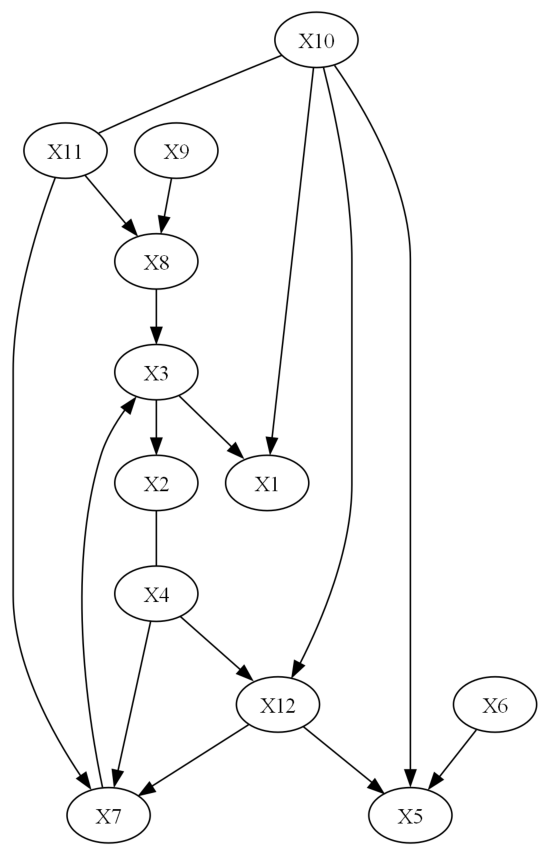

In [ ]:
causallearn_cg.draw_pydot_graph()

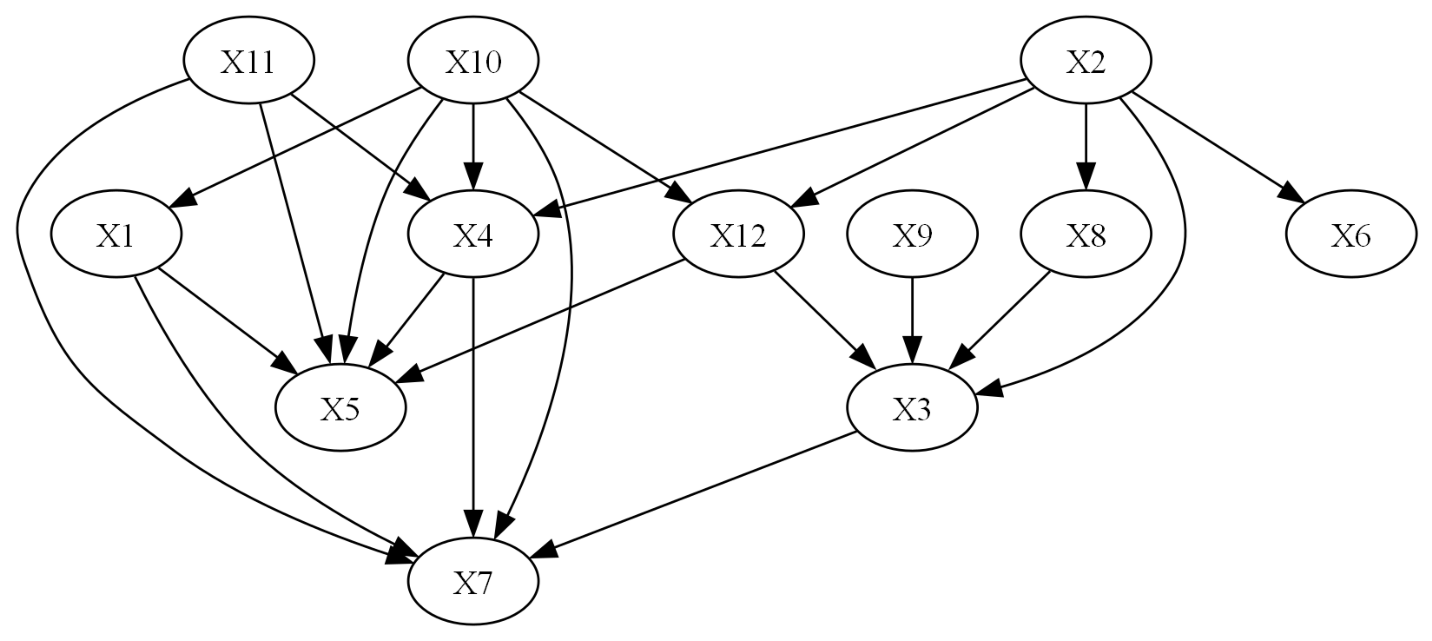

In [ ]:
cluster_dag.true_dag.draw_pydot_graph()

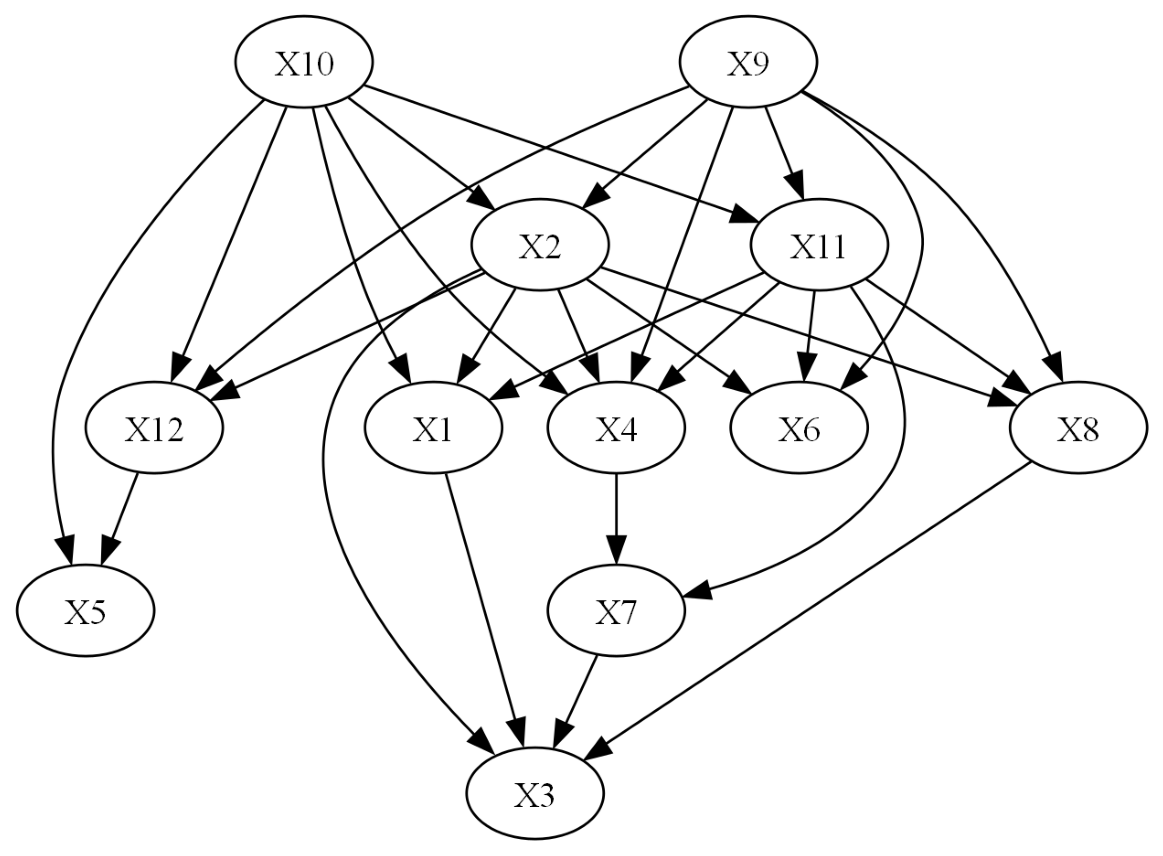

In [ ]:
est_graph.draw_pydot_graph()

{'C1': ['X10'], 'C2': ['X2', 'X9', 'X11', 'X1'], 'C3': ['X6'], 'C4': ['X8', 'X12'], 'C5': ['X4'], 'C6': ['X3', 'X5', 'X7']}


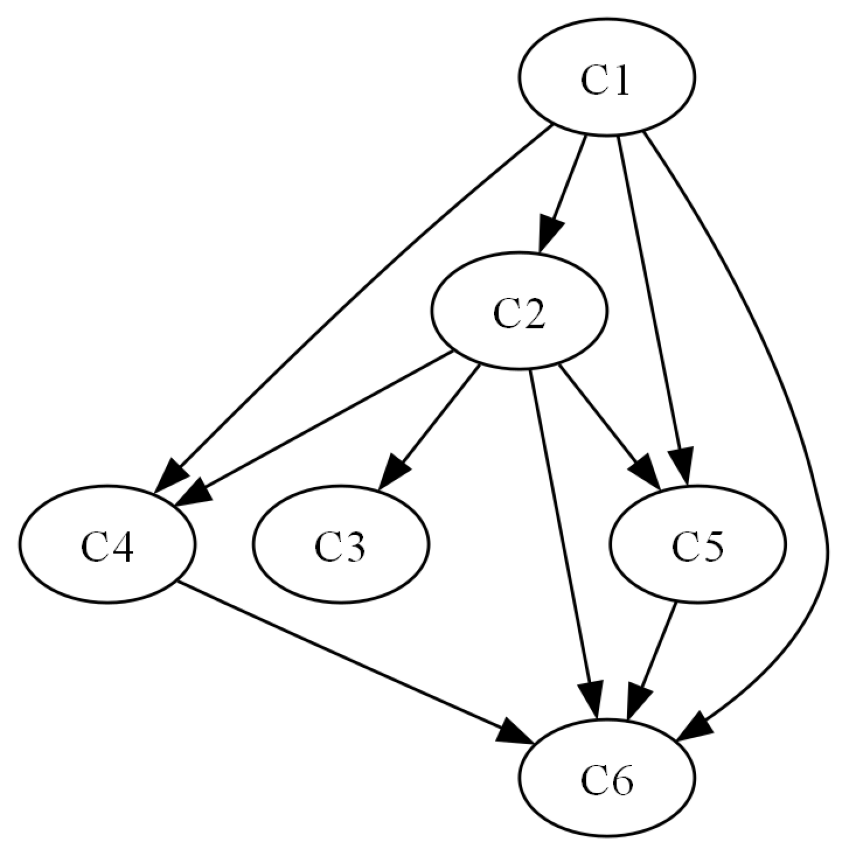

In [ ]:
print(cluster_dag.cluster_mapping)
cluster_dag.cluster_graph.draw_pydot_graph()

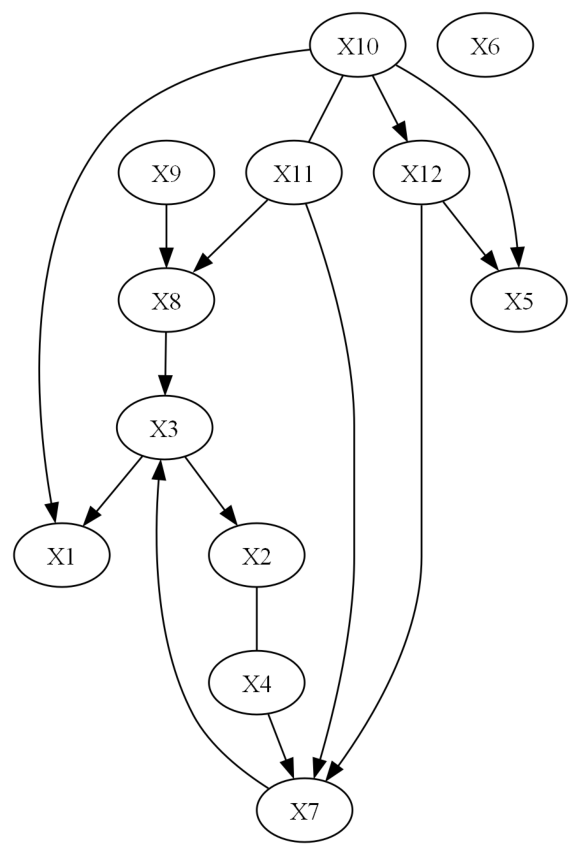

In [ ]:
causallearn_cg.draw_pydot_graph()

In [ ]:
from causallearn.graph.Edge import Edge
from causallearn.graph.Endpoint import Endpoint
n_6 = ClusterDAG.get_node_by_name('X6', cluster_dag.true_dag)
n_8 = ClusterDAG.get_node_by_name('X8', cluster_dag.true_dag)
edge = Edge(n_6, n_8, Endpoint.TAIL, Endpoint.ARROW)
test_cg = causallearn_cg
test_cg.G.add_edge(edge)

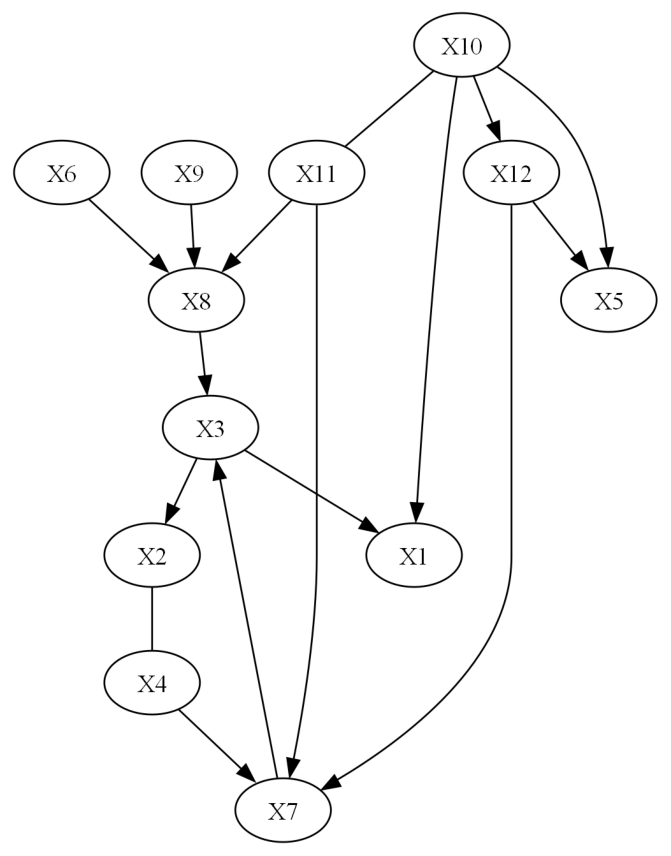

In [ ]:
test_cg.draw_pydot_graph()

In [ ]:
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from causallearn.graph.Edge import Edge
from causallearn.graph.Endpoint import Endpoint

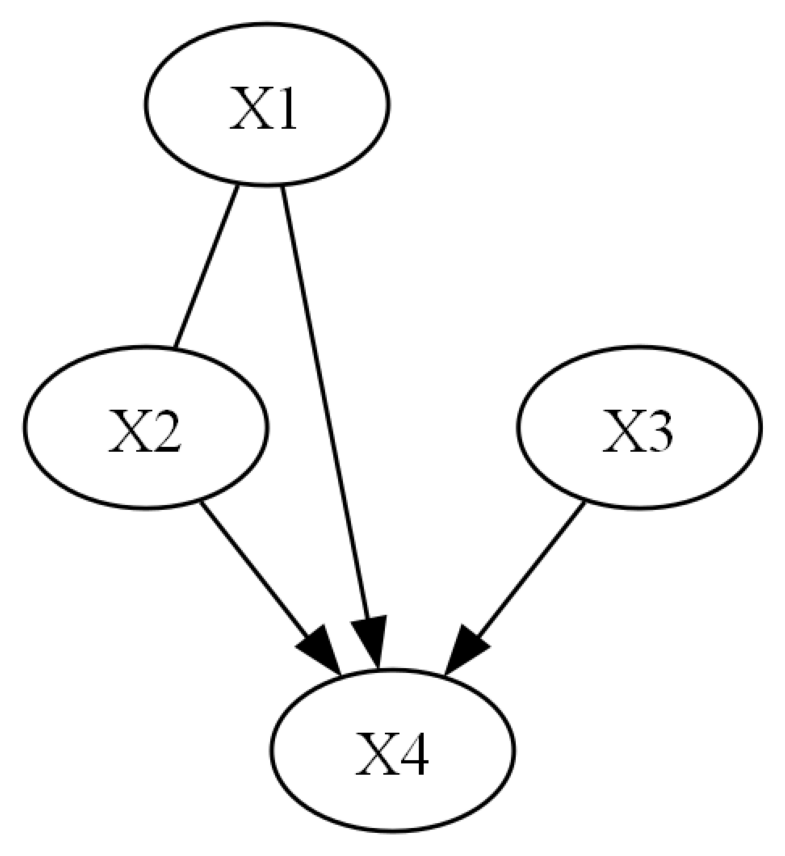

In [ ]:
cluster_mapping = {'C1' : ['X1', 'X2'], 'C2' : ['X3'], 'C3' : ['X4']}
cluster_edges = [('C1', 'C3'), ('C2', 'C3')]
cdag = ClusterDAG(cluster_mapping = cluster_mapping, cluster_edges = cluster_edges)
cdag.cdag_to_mpdag()
cdag.cg.draw_pydot_graph()

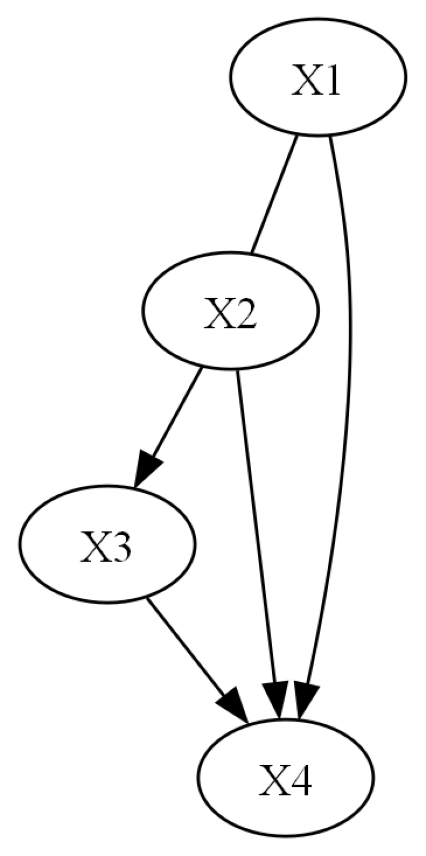

In [ ]:
n_2 = ClusterDAG.get_node_by_name('X2', cdag.cg)
n_3 = ClusterDAG.get_node_by_name('X3', cdag.cg)
edge = Edge(n_2, n_3, Endpoint.TAIL, Endpoint.ARROW)
wrong_cg = cdag.cg
wrong_cg.G.add_edge(edge)
wrong_cg.draw_pydot_graph()

In [ ]:
%load_ext autoreload
%autoreload 2
from clustercausal.experiments.Evaluator import Evaluator
pruned_cg = Evaluator.get_cluster_pruned_benchmark(cdag = cdag, cg = wrong_cg)
pruned_cg == cdag.cg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


True

In [ ]:
# n_1 = ClusterDAG.get_node_by_name('X1', cdag.cg)
# n_2 = ClusterDAG.get_node_by_name('X2', cdag.cg)
# edge = Edge(n_1, n_2, Endpoint.TAIL, Endpoint.TAIL)
# cdag.cg.G.remove_edge(edge)
# cdag.cg.draw_pydot_graph()

In [ ]:
test_cg = evaluation.get_cluster_pruned_benchmark(cdag = cdag, cg = cdag.cg)
test_cg.draw_pydot_graph()